<a href="https://colab.research.google.com/github/milosixsix/IntroductionModelsML/blob/main/Ejercicio_Regresion_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Titanic Kaggle

In [2]:
import pandas as pd
datos = pd.read_csv("train.csv")

In [3]:
datos.head()
#El dataset es obtenido de Kaggle, todos los datos recopilados en esta pagina tienen la descripción de lo que quiere decir el titulo de
# las columnas por ejemplo si queremos saber que es Parch tendríamos que ir a los dataset de kaggle y buscar las especificaciones de los
# datos en este caso, Parch es el numero de padres o hijos que iban a bordo con el sobreviviente

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
datos.describe()
#Descripción de los datos en general, el objetivo es analizar que podemos usar y de manera los valores cuantitavos.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

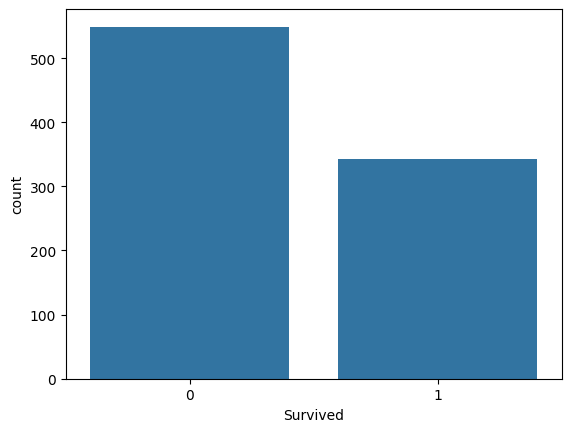

In [5]:
import seaborn as sb
sb.countplot(x="Survived", data=datos)

<Axes: xlabel='Survived', ylabel='count'>

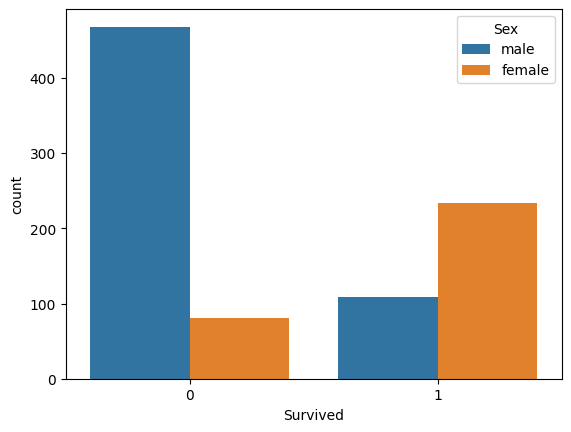

In [6]:
sb.countplot(x="Survived", data=datos, hue="Sex")

In [7]:
datos.isna().sum()
#Podemos observar que hay 177 datos de edad vacíos y 687 de cabina a comparación de los 800 datos que hay estos se pueden eliminar
# la función isna() para observar los datos vacíos pero es mejor agregar sum() para que contabilize la suma de los datos.

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


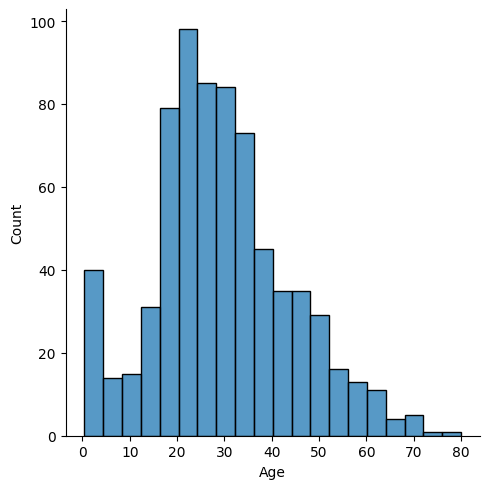

In [8]:
sb.displot(x="Age", data=datos)
#Saber la edad de los pasajeros
#Una gran parte esta entre los 15 y 35
#Necesitamos un proceso para poder sacar el promedio de los datos

In [9]:
datos["Age"]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [10]:
datos["Age"].mean()

np.float64(29.69911764705882)

In [11]:
#Proceso para llenar los datos vacíos
datos["Age"].fillna(datos["Age"].mean())

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [12]:
#Actualización de datos llenados con el promedio
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [13]:
datos["Age"]

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [14]:
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [15]:
if 'Cabin' in datos.columns:
    datos = datos.drop(["Cabin"], axis=1)
else:
    print("Column 'Cabin' not found in DataFrame. It may have been dropped already.")

In [16]:
datos["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [17]:
datos = datos.dropna()

In [18]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
#Eliminación de columnas name, passId y tick
columns_to_drop = ["Name", "PassengerId", "Ticket"]

# Filter out columns that do not exist to prevent KeyError
existing_columns_to_drop = [col for col in columns_to_drop if col in datos.columns]

if existing_columns_to_drop:
    datos = datos.drop(existing_columns_to_drop, axis=1)
    print(f"Columnas eliminadas: {', '.join(existing_columns_to_drop)}")
else:
    print("Ninguna de las columnas especificadas fue encontrada para ser eliminada.")

Columnas eliminadas: Name, PassengerId, Ticket


In [20]:
#Conversión de datos string a datos int en la columna sex
#Esto es posible con la función de get_dummies
#El parametro drop_first es para solo pasar una columna de sexo ya que es redunte si se queda con las 2
if 'Sex' in datos.columns:
    dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True, dtype=int)
else:
    print("Column 'Sex' not found in DataFrame. It may have been dropped already. Skipping creation of dummies_sex.")

In [21]:
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True, dtype = int)
dummies_sex
#Hacer esto es conveniente para evitar un concepto tecnico que es Multicollinearity
# en palabras sencillas el modelo encuentra relaciones donde no debería haber entre male y female

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [22]:
datos = datos.join(dummies_sex) #Agregar datos
datos = datos.drop(["Sex"], axis=1) #Quitar columna sex

<Axes: xlabel='Survived', ylabel='count'>

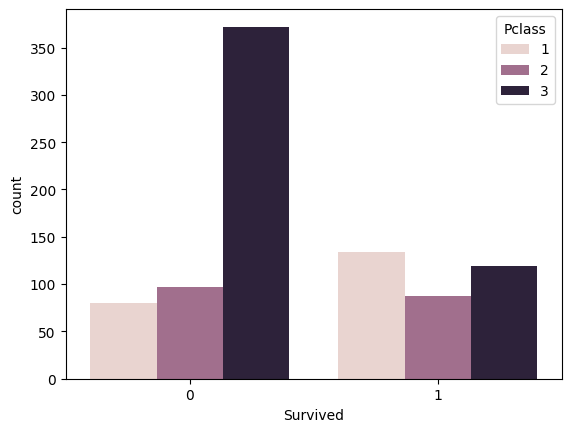

In [23]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [24]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

ValueError: could not convert string to float: 'S'

In [25]:
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


<Axes: xlabel='Survived', ylabel='count'>

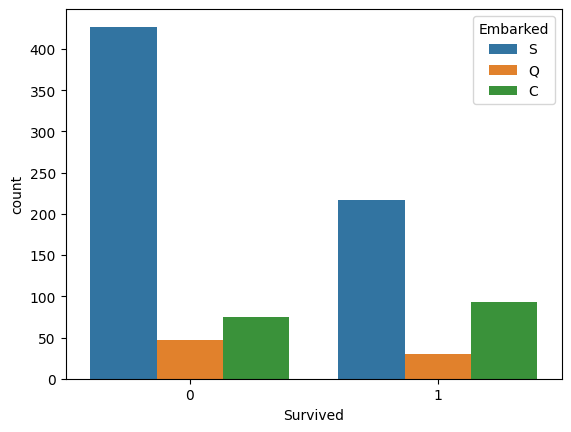

In [26]:
#Realizar una gráfica nos ayuda a poder entender si las datos pueden ser relevantes para
# nuestro modelo sino los eliminamos
sb.countplot(x="Survived", data=datos, hue="Embarked")

In [27]:
if 'Embarked' in datos.columns:
    dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True, dtype=int)
else:
    print("Column 'Embarked' not found in datos. It may have been dropped already. Skipping creation of dummies_embarked.")
    # If dummies_embarked is strictly needed for downstream cells, you might need to re-run previous steps
    # or handle its creation differently if Embarked is already gone. Currently, it exists from a prior successful run.

In [28]:
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

In [29]:
dummies_embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [30]:
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<Axes: >

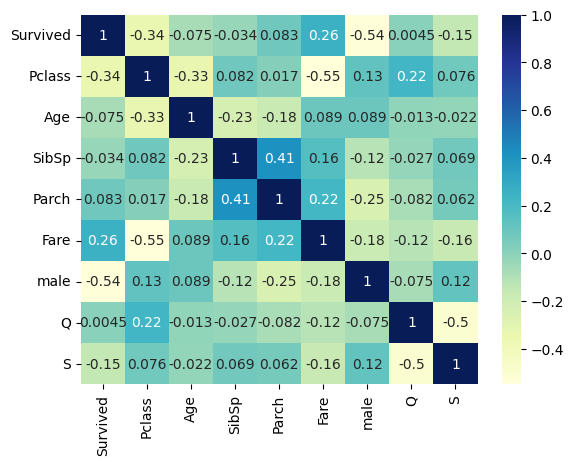

In [31]:
#Observar las correlaciones, annot recordar que es para los numeros
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

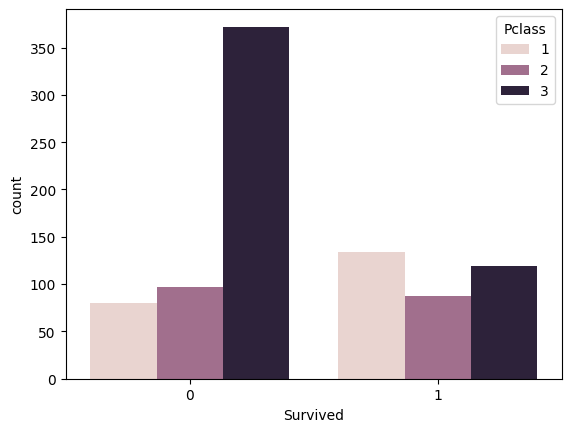

In [32]:
#Observar la informacion de los que no sobrevivieron la mayoría eran de la tercer clase
#La gráfica anterior muestra una correlacion fuerte, entre mas pagabas mas probabilidad de sobrevivir había
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [33]:
#Comenzar el entramiento separandoo en x y Y
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [34]:
#Modelo de entrenamiento, recordar que el test_size es la cantidad de datos que va a tomar
# el fit para realizar el entrenamiento en este caso .2 equivale al 20% de los datos
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [35]:
#Modelo de LogisticRegression para iniciar el entrenamiento ya con nuestros datos preparados
#max_iter para poder realizar nuestras iteraciones sin que haya un límite y evitar problemas en el entranamiento
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_ent, y_ent)

LogisticRegression(max_iter=1000)

In [36]:

predicciones = modelo.predict(X_pru)

In [37]:
#Observar como le fue a nuestro modelo, usando la funcion accuracy
#dando un paso de parametros entre los datos de prueba y las predicciones
#La exactitud puede ser ambigua ya que el conunto de datos no esta bien balanceado
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.7865168539325843

In [38]:
#Agregamos otras formas de conocer más informacíon con lo siguiente
#Así medimos que tan bien le esta llendo a nuestro modelo con precision, recall, etc.
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       114
           1       0.69      0.73      0.71        64

    accuracy                           0.79       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.79      0.79       178



In [39]:
#Conociendo otras metricas con la matriz de confusión

from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

array([[93, 21],
       [17, 47]])

In [40]:
#Mejoramos lo anterior agregando columnas = predicciones con no y si. Y agregando indices con los real: no y si
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

#La tabla explica como el modelo predice los datos: Cuando el modelo predijo que no, en 93 fue efectivo que no habían sobrevivido, sin embargo en
# 17 predijo que no, pero si sobrevivieron y paso lo mismo con los datos de pred: si
#El reporte de clasificación de la linea 38 usa estos datos para poder calcular los datos en macro, accurracy, etc.

,Pred: No,Pred: Si
Real: No,93,21
Real: Si,17,47


In [41]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [42]:
#En esta parte agregamos un nueva persona para poder comprobar las predicciones de nuestro modelo
#Adicionalmente los cambios que tienen mas peso en la lista son la clase y costo o pago efectuado
nueva_persona = [2, 35, 0, 0, 80, 0, 0, 0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
  print("Sobreviviste")
else:
  print("No sobreviviste")

Sobreviviste


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
